# Student Marks Data
https://www.kaggle.com/datasets/evanrobert/studentdata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import opendatasets as od
from datetime import datetime, date, time

In [80]:
st = pd.read_csv(r'c:/users/godwi/GitHub/Python-Pandas/studentdata/STUDENT_DATASET.csv')
st.head()


,age,sex,Marks(400),Section,name,City,percentage
0,19,female,300,A,AAA,Banglore,75.0
1,18,male,330,B,BBB,Pune,82.5
2,28,male,324,C,CDC,Mumbai,81.0
3,33,male,322,D,SDC,Delhi,80.5
4,32,male,240,A,SFG,Mumbai,60.0


In [3]:
st.columns = st.columns.str.lower()  # change all columns name to lower case

In [4]:
st.head()

,age,sex,marks(400),section,name,city,percentage
0,19,female,300,A,AAA,Banglore,75.0
1,18,male,330,B,BBB,Pune,82.5
2,28,male,324,C,CDC,Mumbai,81.0
3,33,male,322,D,SDC,Delhi,80.5
4,32,male,240,A,SFG,Mumbai,60.0


In [5]:
st[st.index == 'TYU']

,age,sex,marks(400),section,name,city,percentage


In [6]:
st.shape

(99, 7)

In [7]:
st[st.index.duplicated()]

,age,sex,marks(400),section,name,city,percentage


# Distribution of gender with marks

In [8]:
st.loc[:, ['sex','marks(400)']].head()

,sex,marks(400)
0,female,300
1,male,330
2,male,324
3,male,322
4,male,240


In [11]:
st_sex = st.loc[:, ['sex','marks(400)']].groupby('sex').sum()
st_sex # pandas python code

,marks(400)
sex,
female,16187
male,14638


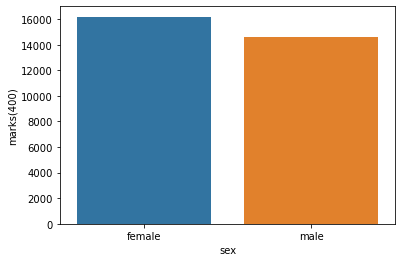

In [13]:
# with seaborn
sns.barplot(data = st_sex , x = st_sex.index \
        ,y = st_sex['marks(400)']);

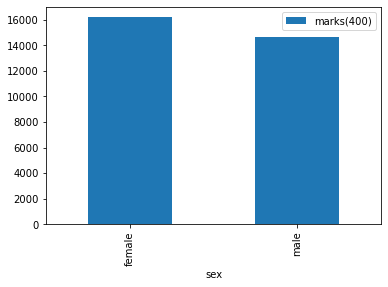

In [18]:
# with matplotlib
st_sex.plot(kind = 'bar');

# What city has the highest performers by gender ?

In [22]:
stx = st.loc[:, ['city','marks(400)', 'sex']]

In [23]:
stx.pivot_table ( index = 'city', columns = 'sex' , 
    values = 'marks(400)', aggfunc ='mean').T # T is transpose

city,Banglore,Delhi,Mumbai,Pune
sex,,,,
female,334.769231,298.5,314.375,321.312500
male,286.846154,334.5,292.000,312.529412


In [24]:
# Relationship between age and mark

In [32]:
st_rel = st.loc[:, ['age', 'marks(400)']]
st_rel.head()

,age,marks(400)
0,19,300
1,18,330
2,28,324
3,33,322
4,32,240


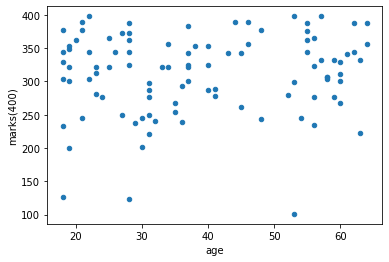

In [37]:
st_rel.plot(kind = 'scatter', x = 'age' , y = 'marks(400)');

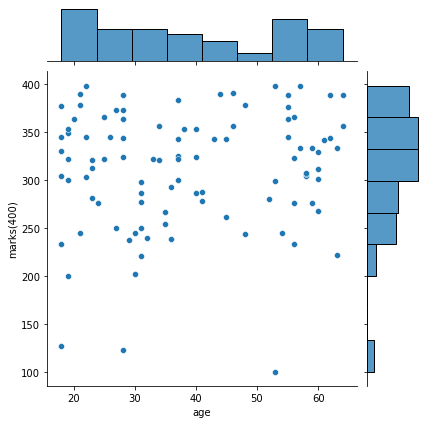

In [52]:
sns.jointplot(data = st_rel, x = 'age' , y= 'marks(400)');

In [51]:
st_rel.age.corr(st_rel['marks(400)'])

0.10183488365677396

# Best student

In [69]:
st.loc[:, ['name','marks(400)','percentage']].sort_values('marks(400)',ascending = False).nlargest(5,'marks(400)')

,name,marks(400),percentage
75,DSA,398,99.50
78,DFR,398,99.50
91,JKP,398,99.50
6,SDS,390,97.50
74,FDS,389,97.25


# best male and female student 

In [76]:
bf =st[st.sex == 'female' ].nlargest(1,'marks(400)')
bm= st[st.sex == 'male' ].nlargest(1,'marks(400)')
pd.concat([bf,bm])

,age,sex,marks(400),section,name,city,percentage
78,22,female,398,C,DFR,Banglore,99.5
75,57,male,398,D,DSA,Delhi,99.5
